In [1]:
from __future__ import absolute_import
import tools._init_paths
from tools.wrapped_model import WrappedDetectron
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
model = WrappedDetectron()

Called with args:
Namespace(cfg_file='configs/baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml', cuda=True, dataset='coco', image_dir='test_imgs/', load_detectron='data/model_final.101.pkl')
load cfg from file: configs/baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml
loading detectron weights data/model_final.101.pkl
loaded models


In [4]:
cls_boxes, cls_segms, cls_keyps = model.forward('test_imgs/02.jpg')

/home/marc/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/marc/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [5]:
from core.test import global_stuff

In [6]:
len(global_stuff)

39

In [7]:
im = cv2.imread('test_imgs/02.jpg')
m = im.copy()

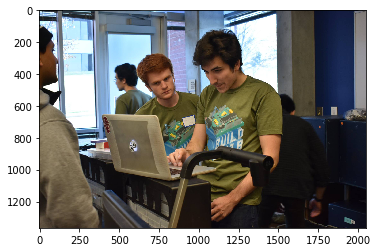

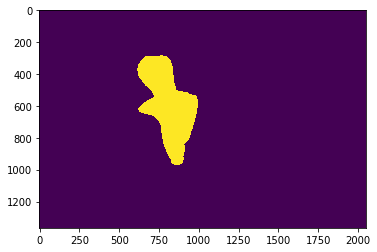

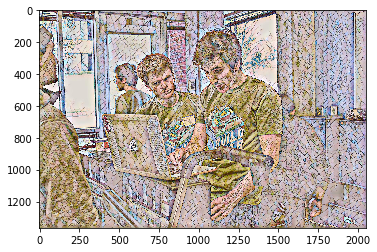

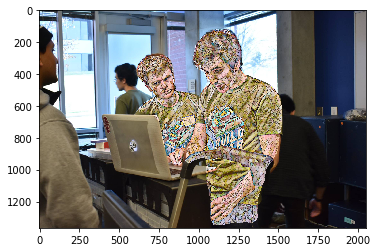

In [8]:
im = cv2.imread('test_imgs/02.jpg')
m = im.copy()

i = 2

#original
plt.imshow(m[:, :, ::-1])
plt.show()

#mask
plt.imshow(global_stuff[4])
plt.show()

#styled
styled = cv2.imread('02_styled.jpg')
styled = cv2.resize(styled, (2048, 1365)) 
plt.imshow(styled[:, :, ::-1])
plt.show()

#merged
m[(global_stuff[i] == 1) | (global_stuff[4] == 1)] = 0
styled[(global_stuff[i] == 0) & (global_stuff[4] == 0)] = 0
final = (m+styled)
plt.imshow(final[:, :, ::-1])
plt.show()

In [9]:
cv2.imwrite('out.png', final)

True

In [10]:
(global_stuff[i] == 1)| (global_stuff[3] == 1)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])